In [28]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(10)

#---------------------step 1/5 生成数据---------------------#

In [29]:
sample_nums = 100
mean_value = 1.7
bias = 1
n_data = torch.ones(sample_nums,2)
#要生成100个（x1,x2)的坐标点 所以输入torch.normal()中均值mean的形状为(100,2)
#这是通过先生成n_data 再乘上mean_value 就得到一个(100,2)的mean张量 值为1.7
x0 = torch.normal(mean_value*n_data,1)+bias
y0 = torch.zeros(sample_nums)
x1 = torch.normal(-mean_value*n_data,1)+bias
y1 = torch.ones(sample_nums)
train_x = torch.cat((x0,x1),dim=0)
train_y = torch.cat((y0,y1),dim=0)

In [30]:
x0

tensor([[ 1.8827,  2.1444],
        [ 1.8733,  1.4030],
        [ 2.5026,  1.7357],
        [ 2.1867,  5.3278],
        [ 1.9535,  3.7051],
        [ 2.4432,  3.1765],
        [ 2.0348,  2.3373],
        [ 1.2496,  2.4504],
        [ 3.5298,  3.8209],
        [ 3.6999,  3.8167],
        [ 3.7763,  2.6338],
        [ 2.8315,  2.8681],
        [ 2.7562,  2.9456],
        [ 3.6535,  3.0553],
        [ 2.9121,  2.3622],
        [ 2.3464,  2.4271],
        [ 4.0290,  3.8974],
        [ 1.4355,  2.2656],
        [ 0.5194,  1.5906],
        [ 0.6590,  2.7334],
        [ 1.6195,  1.8168],
        [ 3.6741,  3.2632],
        [ 1.5849,  2.8490],
        [ 1.6077,  1.2449],
        [ 2.2189,  1.6177],
        [ 3.0177,  5.4470],
        [ 3.0690,  4.0373],
        [ 1.7820,  1.7385],
        [ 2.6949,  3.0538],
        [ 2.3440,  1.9334],
        [ 3.1301,  2.8497],
        [ 2.4540,  1.2364],
        [ 3.2876,  1.5397],
        [ 3.7045,  2.1251],
        [ 3.2853,  1.3342],
        [ 1.3666,  2

In [31]:
x0.data.numpy()[:,0]

array([1.8826661 , 1.8733106 , 2.5026212 , 2.186701  , 1.9535043 ,
       2.4431608 , 2.03479   , 1.2496489 , 3.5297732 , 3.6999133 ,
       3.7762837 , 2.831527  , 2.7561655 , 3.6534984 , 2.9120936 ,
       2.3463905 , 4.0290294 , 1.4354836 , 0.5194011 , 0.658962  ,
       1.6195018 , 3.6741045 , 1.5848837 , 1.6076994 , 2.218904  ,
       3.0177033 , 3.0690198 , 1.7820235 , 2.694923  , 2.3440397 ,
       3.1300914 , 2.4540005 , 3.2876043 , 3.7045193 , 3.2853055 ,
       1.3666222 , 3.9486594 , 3.9525313 , 2.7200794 , 5.143178  ,
       3.3273194 , 3.303882  , 2.9346397 , 2.4805403 , 2.7915964 ,
       4.2199087 , 0.40221405, 3.6081557 , 2.9606857 , 2.44623   ,
       2.1221058 , 2.4246469 , 3.55786   , 1.9962866 , 3.7014484 ,
       0.43555784, 4.3946743 , 3.9974225 , 3.3608406 , 3.4813008 ,
       1.865065  , 3.9962735 , 1.751318  , 3.2065718 , 2.5254014 ,
       3.5670187 , 2.8254445 , 3.3313184 , 2.4083624 , 3.3345675 ,
       3.6712909 , 2.4948633 , 2.6274986 , 0.8666978 , 3.09233

#---------------------step 2/5 选择模型---------------------#

In [32]:
class LR(nn.Module):
    def __init__(self) -> None:
        super(LR,self).__init__()
        self.features = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        x = self.features(x)
        x = self.sigmoid(x)
        return x
    
lr_net = LR()
lr_net

LR(
  (features): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [33]:
lr_net.features.weight,lr_net.features.weight.shape

(Parameter containing:
 tensor([[-0.0459, -0.4516]], requires_grad=True),
 torch.Size([1, 2]))

In [34]:
lr_net.features.bias == lr_net.features.bias[0]

tensor([True])

#---------------------step 3/5 选择损失函数---------------------#

In [35]:
loss_fn = nn.BCELoss()

#---------------------step 4/5 选择优化器---------------------#

In [36]:
lr = 0.01
optimizer = torch.optim.SGD(lr_net.parameters(),lr=lr,momentum=0.9)

#---------------------step 5/5 模型训练---------------------#

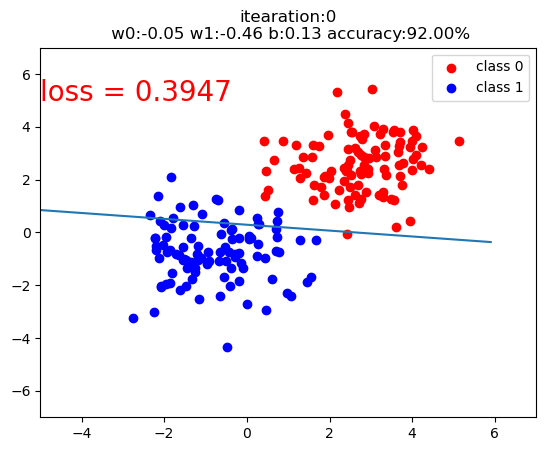

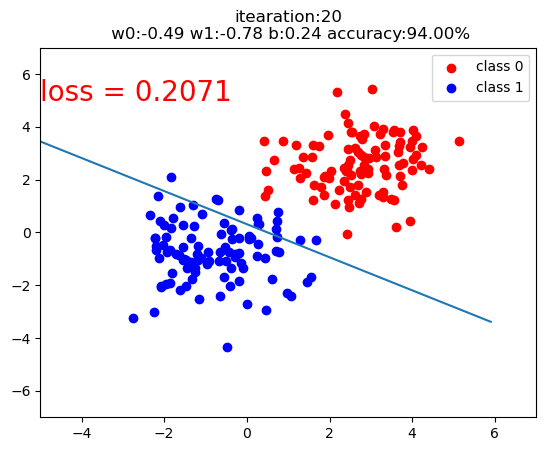

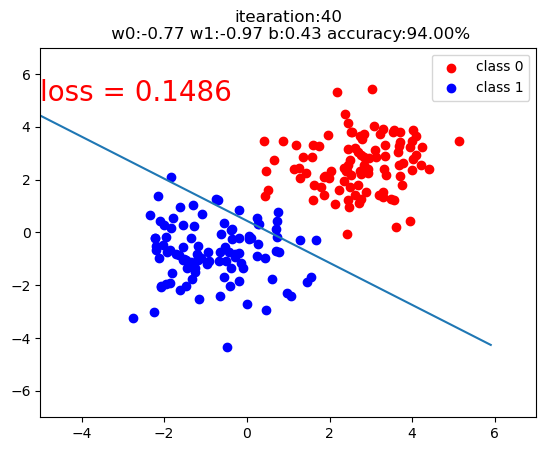

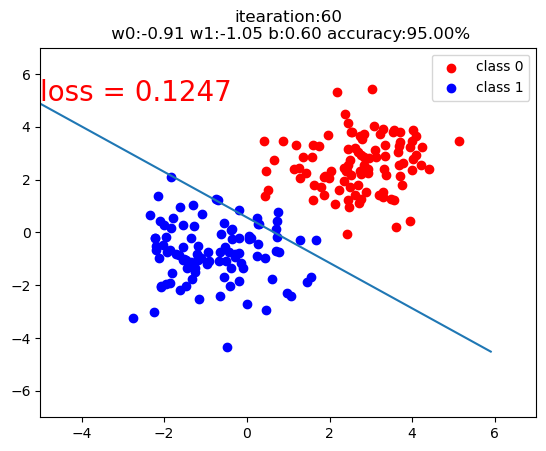

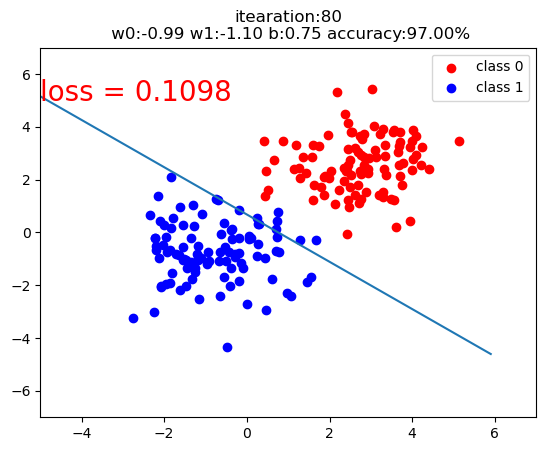

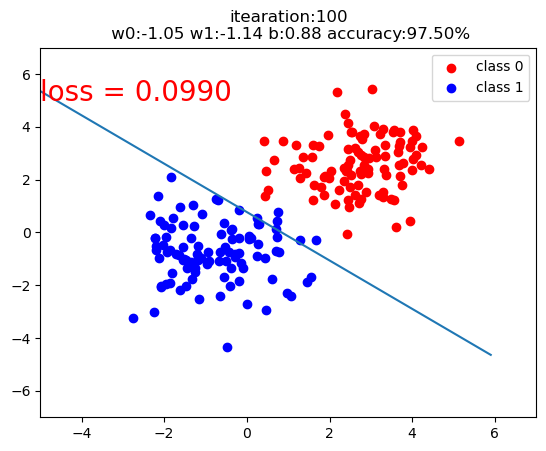

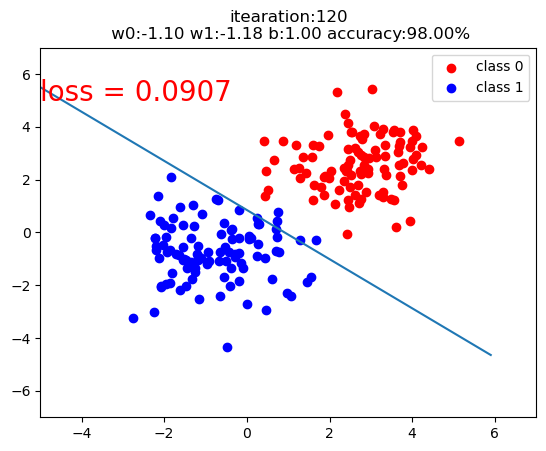

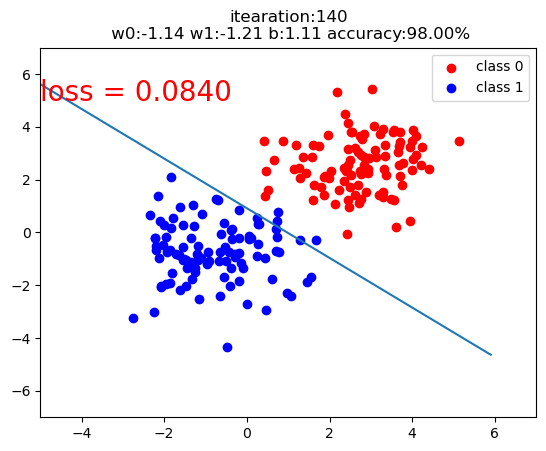

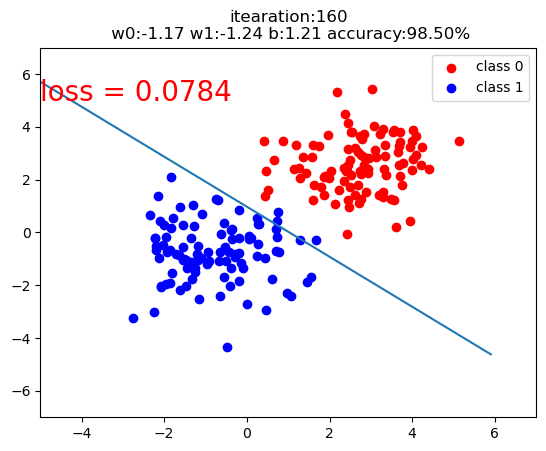

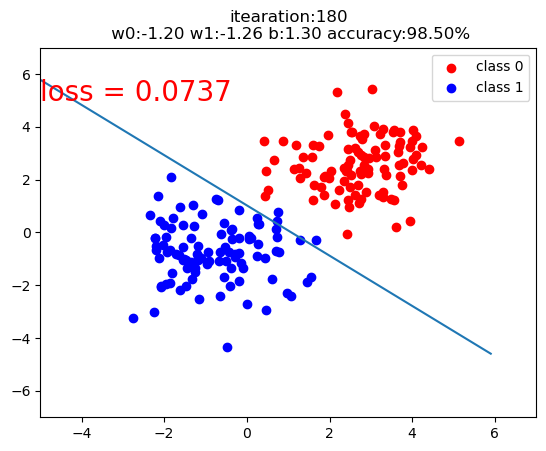

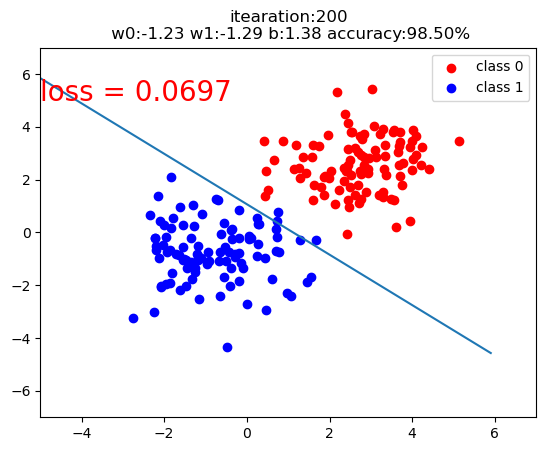

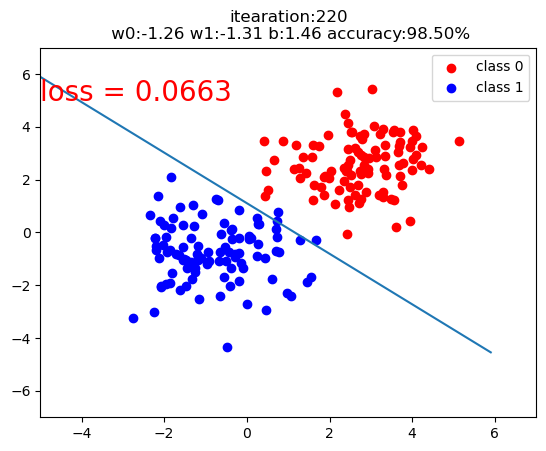

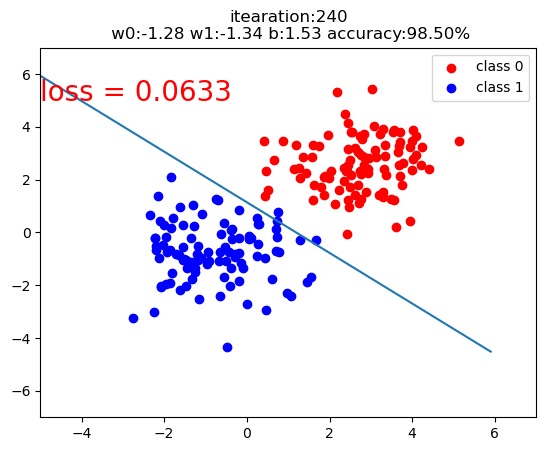

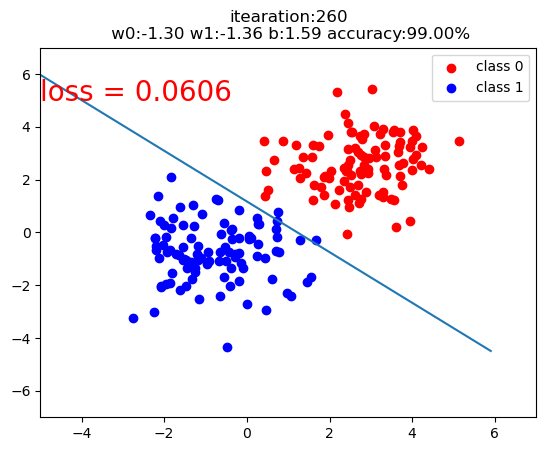

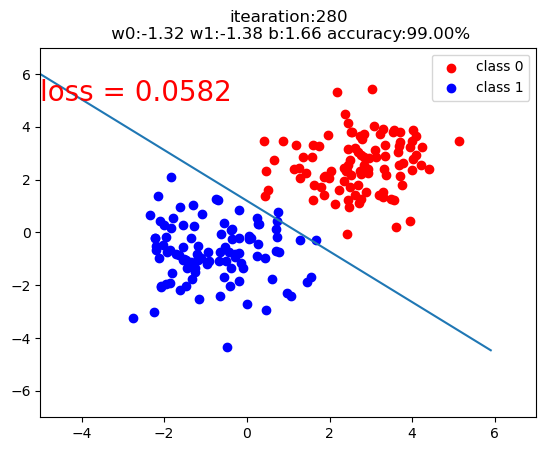

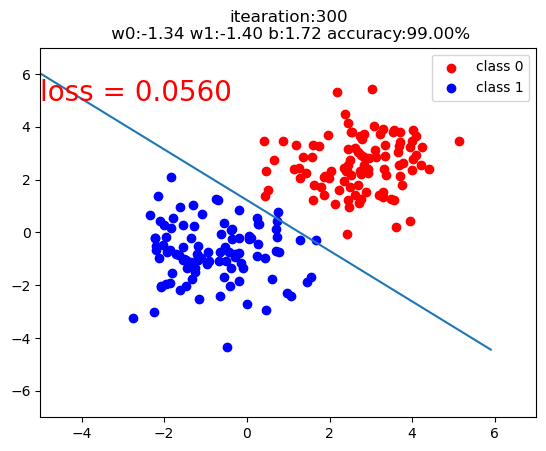

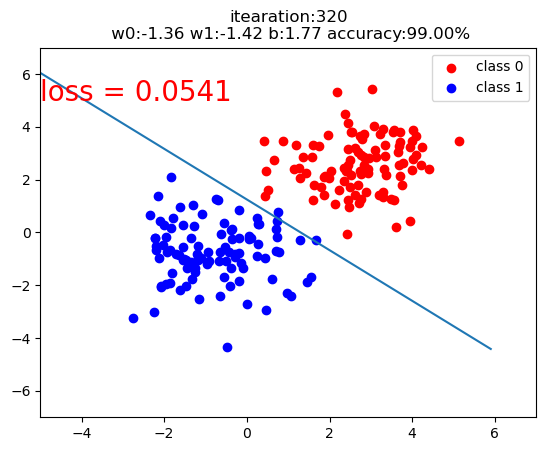

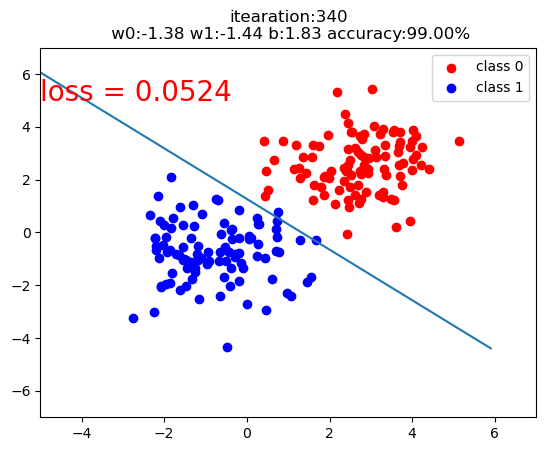

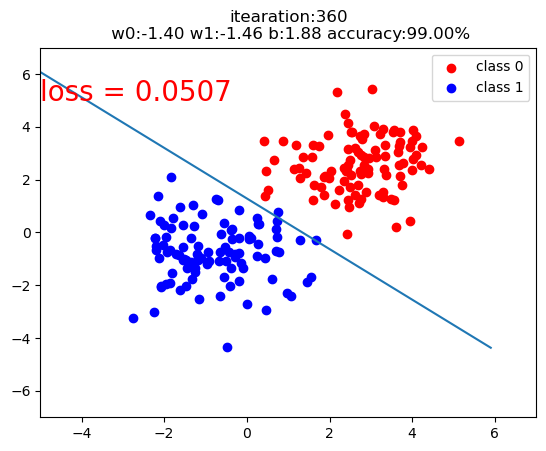

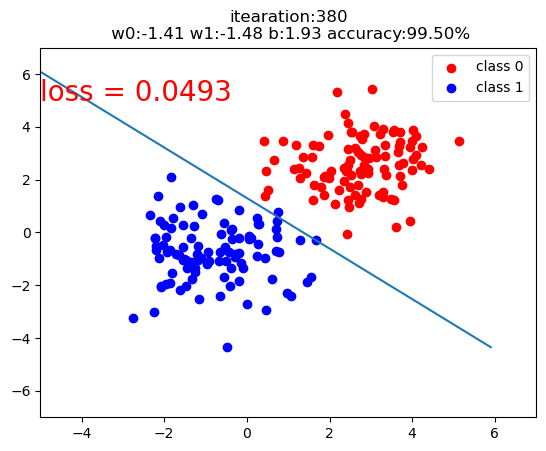

In [37]:
for itear in range(1000):
    y_pred = lr_net(train_x)

    loss = loss_fn(y_pred.squeeze(),train_y)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

    if itear%20 == 0:

        mask = y_pred.ge(0.5).float().squeeze()
        correct = (mask == train_y).sum()
        acc = correct.item() / train_y.size(0)

        plt.scatter(x0.data.numpy()[:,0],x0.data.numpy()[:,1],c = 'r',label = 'class 0')
        plt.scatter(x1.data.numpy()[:,0],x1.data.numpy()[:,1],c = 'b',label = 'class 1')

        w0,w1 = lr_net.features.weight[0]
        w0,w1 = float(w0.item()),float(w1.item())
        plot_b = float(lr_net.features.bias[0].item())
        plot_x0 = np.arange(-6,6,0.1)
        #w0*x0 + w1*x1 + b = 0
        plot_x1 = (-w0*plot_x0-plot_b)/w1
        
        plt.xlim(-5,7)
        plt.ylim(-7,7)
        plt.plot(plot_x0,plot_x1)

        plt.text(-5,5,'loss = %.4f'%loss.data.numpy(),fontdict={'size':20,'color':'red'})
        plt.title('itearation:{}\n w0:{:.2f} w1:{:.2f} b:{:.2f} accuracy:{:.2%}'.format(itear,w0,w1,plot_b,acc))
        plt.legend()

        plt.show()
        plt.pause(0.5)

        if acc>0.99:
            break